# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Untuk melihat dan mengambil informasi petukaran kurs dollar ke rupiah)

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
pip install -r requirements.txt


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -----------------

In [30]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [31]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [32]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [33]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=u


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(mencari letak bagian dari interface mana yang akan kita tampilkan)*

In [48]:
table = soup.find('table',attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
  


Next, we need to find the row length.

In [50]:
#menghitung jumlah row data

row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

130

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [55]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    # Scraping process
    #get period
    tanggal = table.find_all('a', attrs={'class': 'w'})[i].text

    #get inflation mom
    kurs = table.find_all('span', attrs={'class':'w'})[i].text

    temp.append((tanggal,kurs))
    
temp

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2024-7-25', '1 U

In [56]:
# function mengurutkan
temp = temp[::-1]
temp

[('2024-3-4', '1 USD = 15,760 IDR'),
 ('2024-3-5', '1 USD = 15,743 IDR'),
 ('2024-3-6', '1 USD = 15,660 IDR'),
 ('2024-3-7', '1 USD = 15,627 IDR'),
 ('2024-3-8', '1 USD = 15,541 IDR'),
 ('2024-3-11', '1 USD = 15,525 IDR'),
 ('2024-3-12', '1 USD = 15,560 IDR'),
 ('2024-3-13', '1 USD = 15,580 IDR'),
 ('2024-3-14', '1 USD = 15,638 IDR'),
 ('2024-3-15', '1 USD = 15,647 IDR'),
 ('2024-3-18', '1 USD = 15,742 IDR'),
 ('2024-3-19', '1 USD = 15,723 IDR'),
 ('2024-3-20', '1 USD = 15,697 IDR'),
 ('2024-3-21', '1 USD = 15,727 IDR'),
 ('2024-3-22', '1 USD = 15,814 IDR'),
 ('2024-3-25', '1 USD = 15,784 IDR'),
 ('2024-3-26', '1 USD = 15,821 IDR'),
 ('2024-3-27', '1 USD = 15,901 IDR'),
 ('2024-3-28', '1 USD = 15,891 IDR'),
 ('2024-3-29', '1 USD = 15,880 IDR'),
 ('2024-4-1', '1 USD = 15,951 IDR'),
 ('2024-4-2', '1 USD = 15,952 IDR'),
 ('2024-4-3', '1 USD = 15,942 IDR'),
 ('2024-4-4', '1 USD = 15,896 IDR'),
 ('2024-4-5', '1 USD = 15,888 IDR'),
 ('2024-4-8', '1 USD = 15,912 IDR'),
 ('2024-4-9', '1 USD = 

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [109]:
import pandas as pd

df = pd.DataFrame(temp, columns=('tanggal', 'kurs'))
df.head()

,tanggal,kurs
0,2024-3-4,"1 USD = 15,760 IDR"
1,2024-3-5,"1 USD = 15,743 IDR"
2,2024-3-6,"1 USD = 15,660 IDR"
3,2024-3-7,"1 USD = 15,627 IDR"
4,2024-3-8,"1 USD = 15,541 IDR"


In [110]:
df.dtypes

tanggal    object
kurs       object
dtype: object

### Data Cleansing

Merubah tipe data sebelum masuk ke step visualisasi 

In [119]:
# harus di ubah dari object ke string dulu bru ke float
df['kurs']=df['kurs'].astype('string')
df['kurs']=df['kurs'].str.replace("1 USD = ","")
df['kurs']=df['kurs'].str.replace(" IDR",'')
df['kurs']=df['kurs'].str.replace(",",'')
df['kurs']=df['kurs'].astype('int')


df['tanggal'] = df['tanggal'].astype('datetime64[ns]')

df


,tanggal,kurs
0,2024-03-04,15760
1,2024-03-05,15743
2,2024-03-06,15660
3,2024-03-07,15627
4,2024-03-08,15541
...,...,...
125,2024-08-26,15483
126,2024-08-27,15481
127,2024-08-28,15446
128,2024-08-29,15466


### Data Visualization

membentuk index tanggal sebelum membuat visualisasi dengan menggunakan plot

In [120]:
df = df.set_index('tanggal')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='tanggal'>

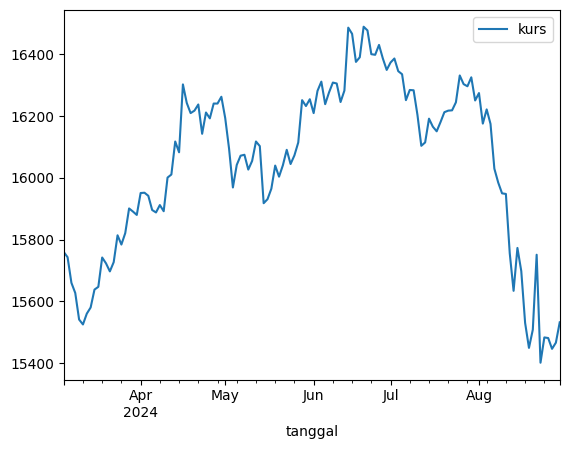

In [121]:
df.plot()

## Analysis

1. USD naik di akhir Apr, dan naik kembali di pertengah Jun
2. USD mengalami penurunan drastis setelah AUG
3. Over all jika bertransaksi beli USD lebih bagus pada sebelum april dan setelah aug


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.